In [83]:
# Import the required libraries and modules
import copy
import string
import collections
import re
import pandas as pd
import numpy as np
import wordcloud
import nltk
from nltk import stem
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import random as rd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
# This code downloads from nltk the list of stop words in a list
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

def tokenize(doc):
    # This function is used for counting the frequency of words
    text = doc.lower().strip()
    text = re.sub(f'[{string.punctuation}]', " ", text)
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

def get_token_counts(token_list):
    token_counter = collections.Counter([txt.lower() for txt in token_list])
    return dict(sorted(token_counter.items(), key=lambda item: item[1], reverse=True))

def generate_wordcloud(frequencies, path):
    cloud = wordcloud.WordCloud(width=800, height=400, background_color = 'white')
    cloud.generate_from_frequencies(frequencies)

    cloud.to_file(path)
    print("FILE GENERATED:", path)


    plt.interactive(True)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')

    plt.title('Word Cloud: ' + path,fontweight="bold")
    plt.show()

def remove_stopwords(token_list):
    tokens_filtered = [token for token in token_list if token not in stop_words]
    return tokens_filtered

[nltk_data] Downloading package stopwords to /home/mihof/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FILE GENERATED: /home/mihof/data/sentiment/Anxiety.png


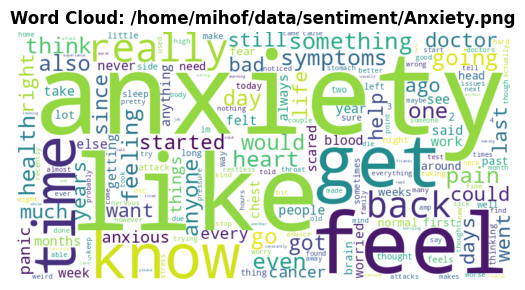

FILE GENERATED: /home/mihof/data/sentiment/Normal.png


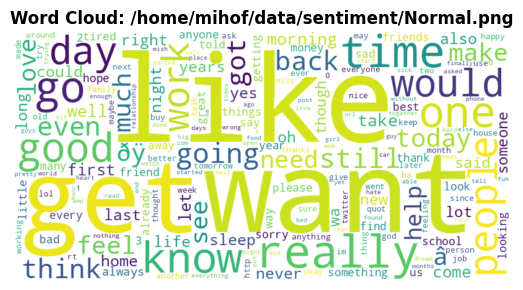

FILE GENERATED: /home/mihof/data/sentiment/Depression.png


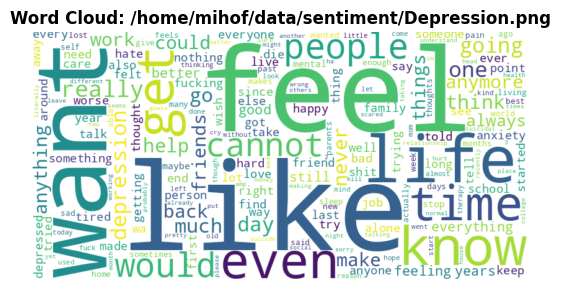

FILE GENERATED: /home/mihof/data/sentiment/Suicidal.png


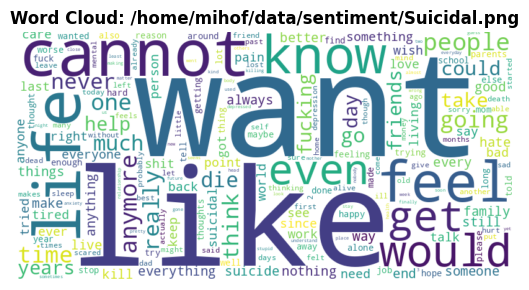

FILE GENERATED: /home/mihof/data/sentiment/Stress.png


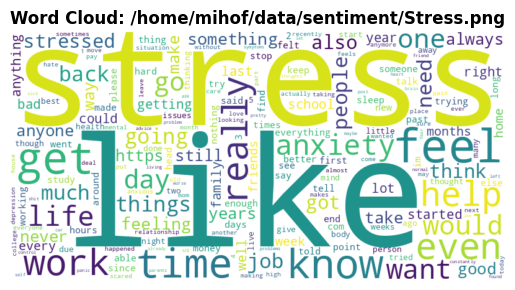

FILE GENERATED: /home/mihof/data/sentiment/Bipolar.png


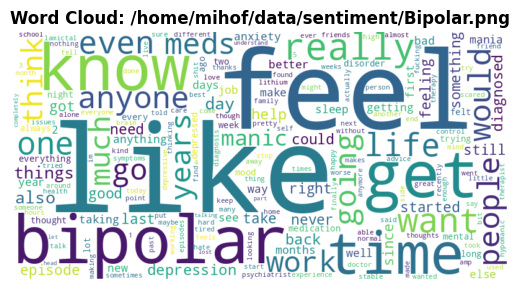

FILE GENERATED: /home/mihof/data/sentiment/Personality disorder.png


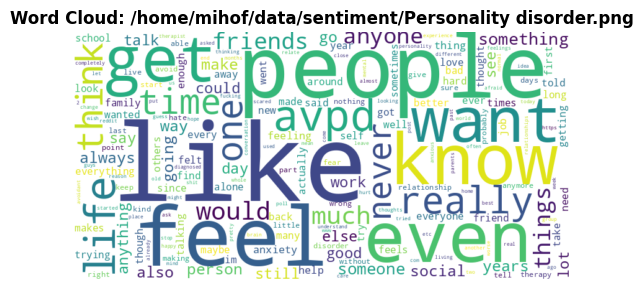

In [85]:
df = pd.read_csv("/home/mihof/data/Combined Data.csv")

# drop null statement
df = df.dropna(subset='statement')

df = df[['statement', 'status']]

statements = []
# Convert the DataFrame to a list of lists and extend reviews_corpus
statement_sentiment_pairs =  df.values.tolist()
statements.extend(statement_sentiment_pairs)

for status in df['status'].unique().tolist():
    # selected_statements = [statement for statement in statements if statements == 'Anxiety']
    selected_statements = [statement for statement in statements if statement[1] == status]
    statement_txt = [statement[0] for statement in selected_statements]

    text = " ".join(statement_txt)

    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    
    # stemming
    # porterstem = stem.PorterStemmer()
    # tokens = [porterstem.stem(x) for x in tokens]
    # tokens = remove_stopwords(tokens)

    tkn_count_dict = get_token_counts(tokens)

    generate_wordcloud(tkn_count_dict, f'/home/mihof/data/sentiment/{status}.png')

In [86]:
df = pd.read_csv("/home/mihof/data/Combined Data.csv")

# drop null statement
df = df.dropna(subset='statement')

df = df[['statement', 'status']]

# Remove punctuations
df['statement'] = [statement.translate(str.maketrans('', '', string.punctuation)) for statement in df['statement']]
df['statement'] = df['statement'].apply(tokenize)
df['statement'] = df['statement'].apply(remove_stopwords)
df['statement'] = [" ".join(statement) for statement in df['statement']]

# df2 = copy.deepcopy(df)
# The following applies remove_punc_stopwords function to each value in the given column.
# The result is a column with lower case values that have no punctuations, no stop words,
# df2['statement'] = df2['statement'].apply(remove_stopwords)
# df2['statement'] = [token for token in df2['statement'] if token not in stop_words]

In [90]:
# split the dataset into two: train (85% of the obs.) and test (15% of the obs.)
sub_train, sub_test = train_test_split(df, test_size=0.15)
print(sub_train.head())
print(sub_test.head())

# """ count vectorizer:
# Next, we will use a count vectorizer from the Scikit-learn library. 
# This will transform the text in our dataframe into a 'bag of words' model,
# which will contain a sparse matrix of integers.
# The number of occurrences of each word will be counted and printed.
# We will need to convert the text into a bag-of-words model since the logistic regression
# algorithm cannot understand text.
# The bag-of-words model is a popular technique in natural language processing (NLP)
#  for representing text data as numerical vectors.
# It is a simple and intuitive approach that disregards the order and
# structure of words in a document and focuses solely on their occurrence frequencies.
# """
# # vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(sub_train['statement'])
test_matrix = vectorizer.transform(sub_test['statement'])
print(train_matrix)
print()
print()
print(test_matrix)

# """Perform Logistic Regression"""
lr = LogisticRegression(multi_class="ovr")
X_train = train_matrix
print(X_train)
X_test = test_matrix
y_train = sub_train['status']
y_test = sub_test['status']
lr.fit(X_train, y_train)
print("Coefficients:")
print(lr.coef_)
print("Intercept:")
print(lr.intercept_)
print()

""" Generate the predictions for the test dataset"""
predictions = lr.predict(X_test)
sub_test['predictions'] = predictions
print(sub_test.head(30))
print()

"""Calculate the prediction accuracy"""
sub_test['match'] = sub_test['status'] == sub_test['predictions']
print("")
print("Prediction Accuracy:")
print(sum(sub_test['match']) / len(sub_test))

                                               statement      status
5686                                         0510 6psx b      Normal
43492  sorry sf rescheduling sf trip coming weekend m...      Normal
3582   gathering old intentions make cookies want buy...      Normal
17045  fucking done another way put put mask best fee...  Depression
41261    utdjazzy kia kare wou khudh depression mein hai  Depression
                                               statement      status
43250      somewhere world right sun shining people busy      Normal
41197  language show depression get well soon using m...  Depression
17585  matters would want real person anyways real pe...  Depression
42153  gigdiary know wa little depressed ate much las...      Normal
48433  psychology lab florida state university lookin...      Stress
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1851748 stored elements and shape (44778, 71169)>
  Coords	Values
  (0, 91)	0.6795749287162645
  (0, 2166)	0.6

/home/mihof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Coefficients:
[[-2.23176112e+00 -5.02407432e-01 -1.50522419e-01 ...  1.04074839e-01
   1.04074839e-01  1.04074839e-01]
 [-1.14301816e+00 -2.45254050e-01 -7.51776387e-02 ... -3.34865962e-03
  -3.34865962e-03 -3.34865962e-03]
 [ 2.67216157e+00  1.01386545e+00  5.25674561e-01 ... -1.19746161e-02
  -1.19746161e-02 -1.19746161e-02]
 ...
 [-7.25787691e-01 -1.91206780e-01 -4.55345500e-02 ... -1.57253062e-03
  -1.57253062e-03 -1.57253062e-03]
 [-1.29557257e+00 -3.78095341e-01 -1.85088523e-01 ... -4.18354403e-03
  -4.18354403e-03 -4.18354403e-03]
 [-3.22988284e+00 -1.02375801e+00 -4.03105302e-01 ... -1.04410623e-02
  -1.04410623e-02 -1.04410623e-02]]
Intercept:
[-3.67563788 -4.38095012 -2.25290446  2.26577384 -4.9720723  -3.52644614
 -2.37289285]

                                               statement  \
43250      somewhere world right sun shining people busy   
41197  language show depression get well soon using m...   
17585  matters would want real person anyways real pe...   
42153  gigd

In [89]:
## Multinomial Logistic Regression Model
lr2 = LogisticRegression(multi_class="multinomial")
X_train = train_matrix
print(X_train)
X_test = test_matrix
y_train = sub_train['status']
y_test = sub_test['status']
lr.fit(X_train, y_train)
print("Coefficients:")
print(lr.coef_)
print("Intercept:")
print(lr.intercept_)
print()

""" Generate the predictions for the test dataset"""
predictions = lr.predict(X_test)
sub_test['predictions'] = predictions
print(sub_test.head(30))
print()

"""Calculate the prediction accuracy"""
sub_test['match'] = sub_test['status'] == sub_test['predictions']
print("")
print("Prediction Accuracy:")
print(sum(sub_test['match']) / len(sub_test))

# """ Generate the predictions for the test dataset"""
# predictions2 = lr2.predict(X_test)
# reviews_sub_test['predictions_rating'] = predictions2
# print(reviews_sub_test.head(30))
# reviews_sub_test['match_rating'] = reviews_sub_test['review/score'] == reviews_sub_test['predictions_rating']
# print("")
# print("Prediction Accuracy:")
# print(sum(reviews_sub_test['match_rating']) / len(reviews_sub_test))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1851499 stored elements and shape (44778, 71328)>
  Coords	Values
  (0, 57001)	0.044407374614744935
  (0, 2058)	0.06600524970580478
  (0, 67951)	0.07499121409722104
  (0, 20153)	0.20872420791859086
  (0, 60841)	0.13107507006275834
  (0, 29223)	0.03979936416572201
  (0, 17314)	0.06969562981833255
  (0, 18558)	0.09060177704566788
  (0, 26928)	0.10860600544373193
  (0, 8253)	0.05756086329677683
  (0, 14227)	0.09181703980621538
  (0, 48512)	0.07992025683366785
  (0, 40850)	0.1471638456422893
  (0, 38746)	0.05073364410393795
  (0, 46850)	0.07411778682030998
  (0, 61428)	0.04413279921920004
  (0, 38858)	0.07717641841808628
  (0, 64757)	0.10289069948153144
  (0, 22480)	0.09363116896858428
  (0, 17513)	0.14252293510239394
  (0, 24138)	0.05683043868480403
  (0, 23730)	0.12800698719389206
  (0, 38211)	0.06528783283128037
  (0, 46335)	0.05053926193652036
  (0, 33099)	0.06381503180681652
  :	:
  (44777, 22062)	0.10403383643109204
  (447

/home/mihof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
